### Load some packages

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
cm = 1/2.54
plt.rcParams['font.size'] = 32
np.random.seed(1)

In [112]:
### utils ###

def plot_lats(X, c = 'k', cmap = None, vmin = None, vmax = None, title = ''):
    plt.figure(figsize = (12.5*cm, 12.5*cm))
    plt.scatter(X[0, :], X[1, :], c = c, cmap = cmap, s = 50, vmin = vmin, vmax = vmax)
    plt.xticks([-2, 0, 2])
    plt.yticks([-2, 0, 2])
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title(title)
    plt.show()
    plt.close()
    return

def comp_lats(Xs, cs = ['k', 'k'], cmap = None, vmin = None, vmax = None, titles = ['', '']):
    fig, axs = plt.subplots(1, 2, figsize = (28*cm, 12.5*cm))
    Xs = [zscore(X) for X in Xs]
    for i in range(2):
        axs[i].scatter(Xs[i][0, :], Xs[i][1, :], c = cs[i], cmap = cmap, s = 50, vmin = vmin, vmax = vmax)
        axs[i].set_xticks([-2, 0, 2])
        axs[i].set_xlabel(r'$x_1$')
        axs[i].set_title(titles[i])
    axs[1].set_yticks([])
    axs[0].set_yticks([-2, 0, 2])
    axs[0].set_ylabel(r'$x_2$')
    plt.show()
    plt.close()
    return

def plot_both_lats(X, c2):
    T = X.shape[1]
    fig, axs = plt.subplots(1, 2, figsize = (28*cm, 12.5*cm))
    axs[0].scatter(X[0, :], X[1, :], c = np.arange(T), cmap = 'Greys', s = 50, vmin = -T/4, vmax = T)
    axs[1].scatter(X[0, :], X[1, :], c = c2, cmap = 'Greys', s = 50, vmin = np.amin(c2)-0.2, vmax = np.amax(c2))
    axs[0].set_xticks([-2, 0, 2])
    axs[1].set_xticks([-2, 0, 2])
    axs[0].set_yticks([-2, 0, 2])
    axs[1].set_yticks([])
    axs[0].set_xlabel(r'$x_1$')
    axs[1].set_xlabel(r'$x_1$')
    axs[0].set_ylabel(r'$x_2$')
    axs[0].set_title('time')
    axs[1].set_title('tuning')
    plt.show()
    plt.close()
    return
    
def plot_activity(mat, title = ''):
    plt.figure(figsize = (28*cm, 12.5*cm))
    plt.imshow(mat, cmap = 'Greys', aspect = 'auto', vmin = np.quantile(mat, 0.01), vmax = np.quantile(mat, 0.99))
    plt.xlabel('time')
    plt.xticks([])
    plt.ylabel('neurons')
    plt.yticks([])
    plt.title(title)
    plt.show()
    plt.close()
    return

def plot_tuning(mat, Xt, title = '', n = 0):
    Nt = int(np.sqrt(Xt.shape[1]))
    mat = mat[n, :].reshape(Nt, Nt) #just one neuron
    plt.figure()
    plt.imshow(mat, cmap = 'coolwarm', extent = (Xt[0,0], Xt[0,-1], Xt[1,0], Xt[1,-1]), origin = 'lower')
    plt.show()
    return

def zscore(X):
    return (X - np.mean(X, axis = 1)[:, None]) / np.std(X, axis = 1)[:, None]

def eval_lats(Xtest, Xtrue):
    Xtest, Xtrue = [zscore(X) for X in [Xtest, Xtrue]]
    dists_test = np.sqrt(np.sum((Xtest[:, None, :] - Xtest[..., None])**2, axis = 0)).flatten()
    dists_true = np.sqrt(np.sum((Xtrue[:, None, :] - Xtrue[..., None])**2, axis = 0)).flatten()
    plt.scatter(dists_true, dists_test, marker = ".", s = 10, alpha = 0.5)
    plt.xlabel('true dists')
    plt.ylabel('inf dists')
    plt.title('r = '+str(np.round(pearsonr(dists_test, dists_true)[0], 2)))
    plt.show()
    return

In [65]:
### global LVM parameters ###
D = 2
T = 100
N = 30
print('test')

test


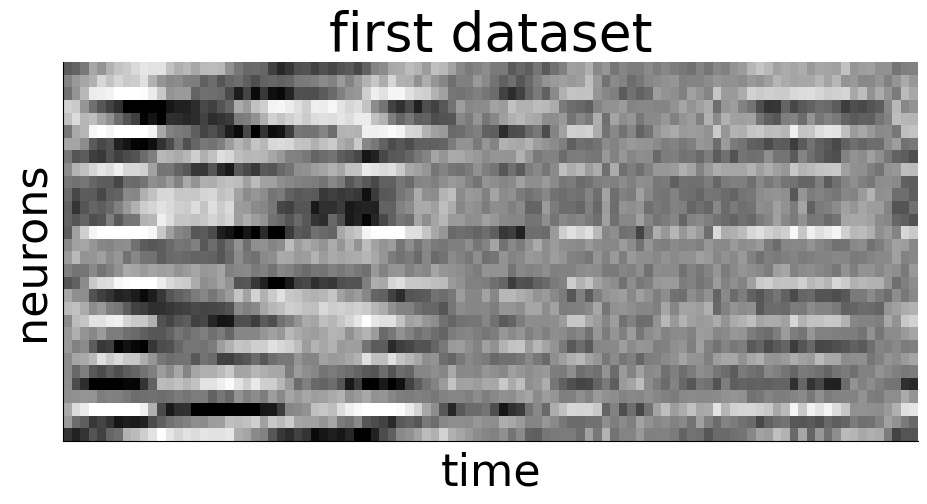

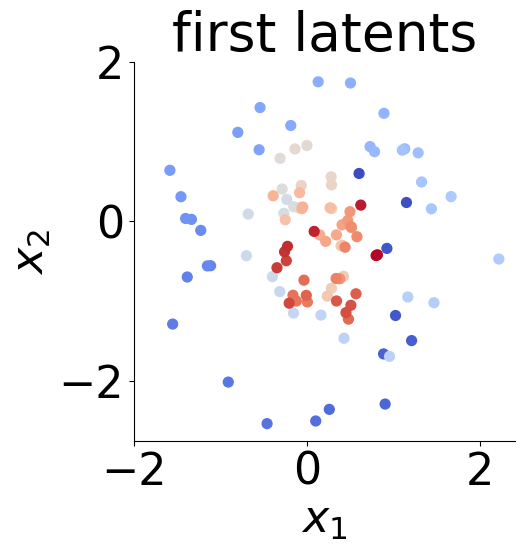

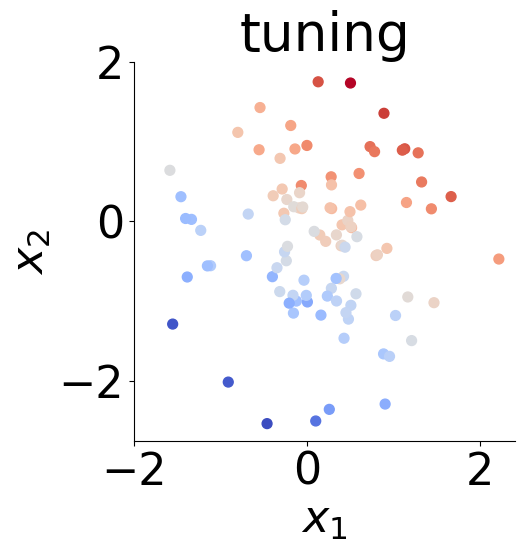

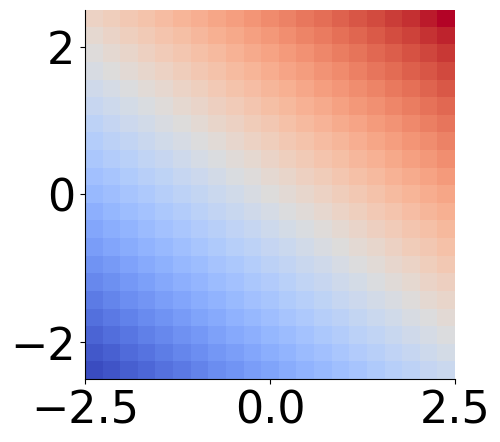

(100, 100) (441, 100) (30, 100) (2, 441) (2, 100)


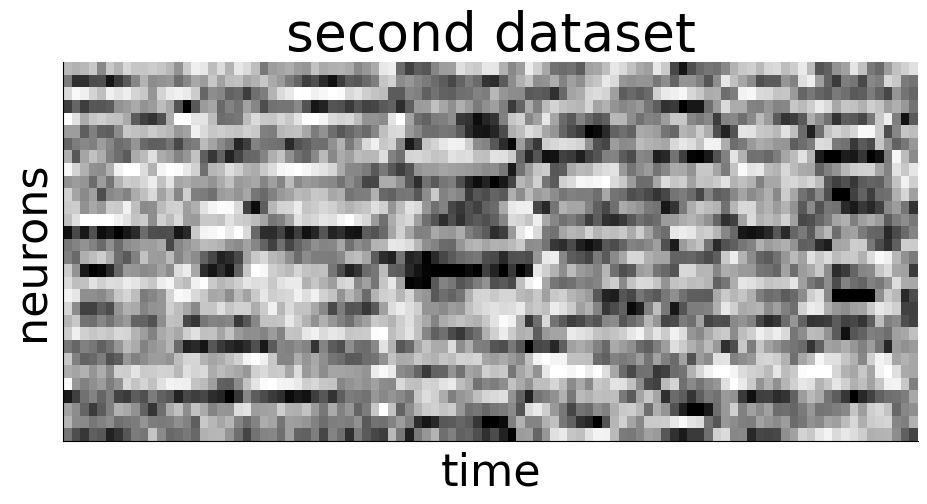

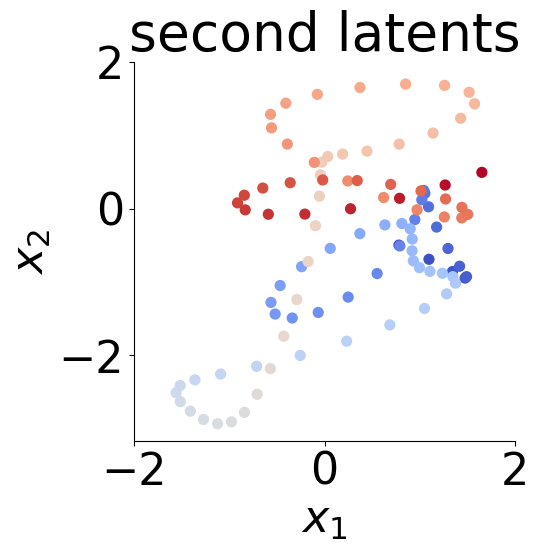

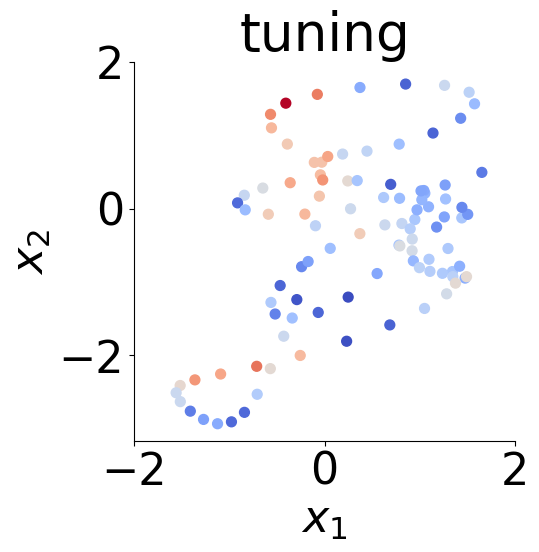

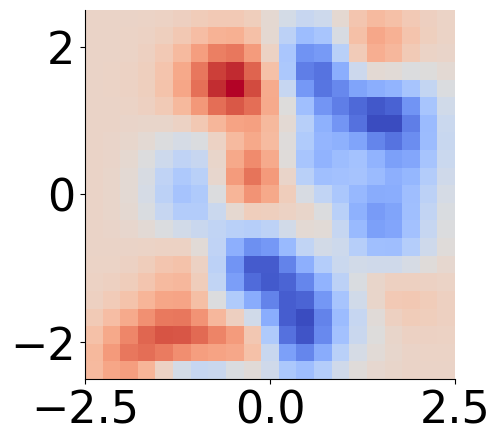

In [94]:
### Generate two datasets

np.random.seed(1)
Nt = 21
Xt = np.array([np.tile(np.linspace(-2.5, 2.5, Nt), Nt), np.repeat(np.linspace(-2.5, 2.5, Nt), Nt)])

T = 100
### Kalman filter
A1 = np.array([[0.9, 0.2], [-0.2, 0.9]])
X1 = np.zeros((D, T))
X1[:, 0] = np.array([0.6,0.6])
for t in range(1, T): X1[:, t] = A1@X1[:, t-1] + np.random.normal(0, 0.3, 2)
C1 = np.random.normal(0, 1, (N, D))
Y1 = C1 @ X1 + np.random.normal(0, 0.3, (N, T))
plot_activity(Y1, title = 'first dataset')
plot_lats(X1, c = np.arange(T), title = 'first latents', cmap = 'coolwarm')
plot_lats(X1, c = Y1[0, :], title = 'tuning', cmap = 'coolwarm')
Y1_t = C1 @ Xt
plot_tuning(Y1_t, Xt, title = 'tuning 1', n = 0)

### GPs
ell = 5
K = np.exp(-(np.arange(T)[:, None] - np.arange(T)[None, :])**2/(2*ell**2))
L = np.linalg.cholesky(K+1e-6*np.eye(T))
X2 = np.random.normal(0,1,(2,T))@L.T

ellx = 0.5
Kx = np.exp(-np.sum((X2[..., None] - X2[:, None, :])**2, axis = 0) / (2*ellx**2)) + 1e-2*np.eye(T)
Lx = np.linalg.cholesky(Kx)
Y2 = np.random.normal(0, 1, (N, T))@Lx.T + 0*np.random.normal(0, 0.3, (N, T))

Ktx = np.exp(-np.sum((Xt[..., None] - X2[:, None, :])**2, axis = 0) / (2*ellx**2))
print(Kx.shape, Ktx.shape, Y2.shape, Xt.shape, X2.shape)
Y2_t = (Ktx @ np.linalg.inv(Kx) @ Y2.T).T

Y2 = Y2+np.random.normal(0, 0.3, (N,T))

#Y2 = C2 @ X2 + np.random.normal(0, 0.3, (N, T))
plot_activity(Y2, title = 'second dataset')
plot_lats(X2, c = np.arange(T), title = 'second latents', cmap = 'coolwarm')
plot_lats(X2, c = Y2[0, :], title = 'tuning', cmap = 'coolwarm')
plot_tuning(Y2_t, Xt, title = 'tuning 2', n = 0)

## Principal component analysis (PCA)

We start by fitting 'principal component analysis'; a very common method in systems neuroscience.
For a given dataset, the principal components (PCs) are given by the _eigenvectors_ of the covariance matrix of the data.
In other words, for a dataset Y, the PCs are given by $C =$eigvecs$((Y - \hat{Y})^T (Y - \hat{Y}) \in \mathbb{R}^{N \times D}$.
We can then form a _low-dimensional_ representation of our data as $X = C^T Y$.

However, we can also take a _probabilistic_ view of PCA (similar to the probabilistic view of linear regression; see Roweis & Ghahramani for a thorough discussion).
In this case, we assume that the data is generated from a set of normally distributed _latent variables_ $X \in \mathbb{R}^{D \times T}$ such that $x_{ij} \sim \mathcal{N}(x; 0, 1)$.
We then assume that the _emph_ data $Y = C X + \epsilon$ is a linear function of these latent variables with Gaussian noise $\epsilon \sim \mathcal{N}(\epsilon; 0, \sigma)$ and $\sigma \rightarrow 0$. 
The linear mapping $C$ is then learned by maximizing the likelihood $\mathcal{L} = p(Y) = \int_X p(Y|X) p(X) dX$.

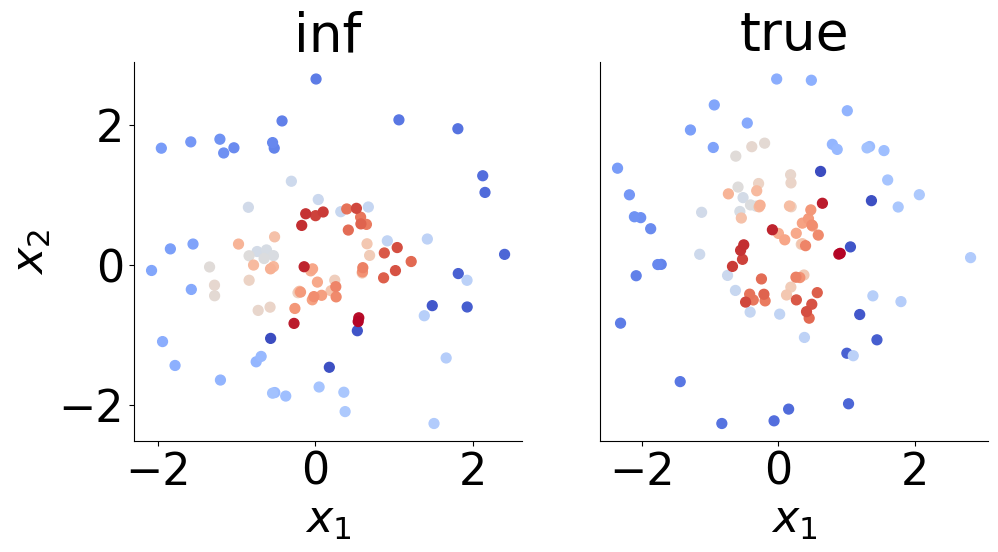

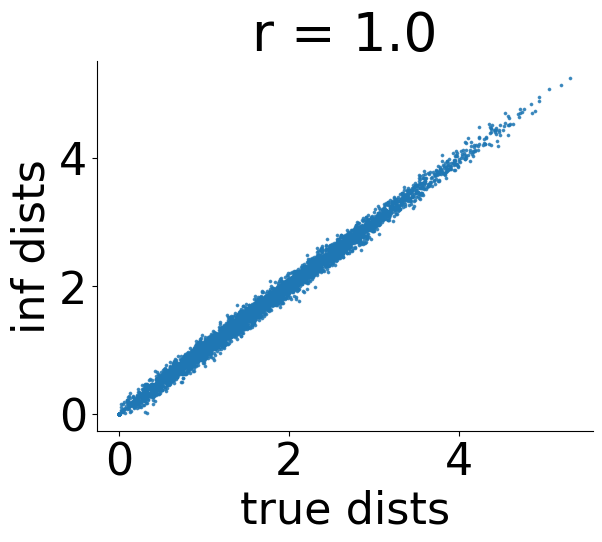

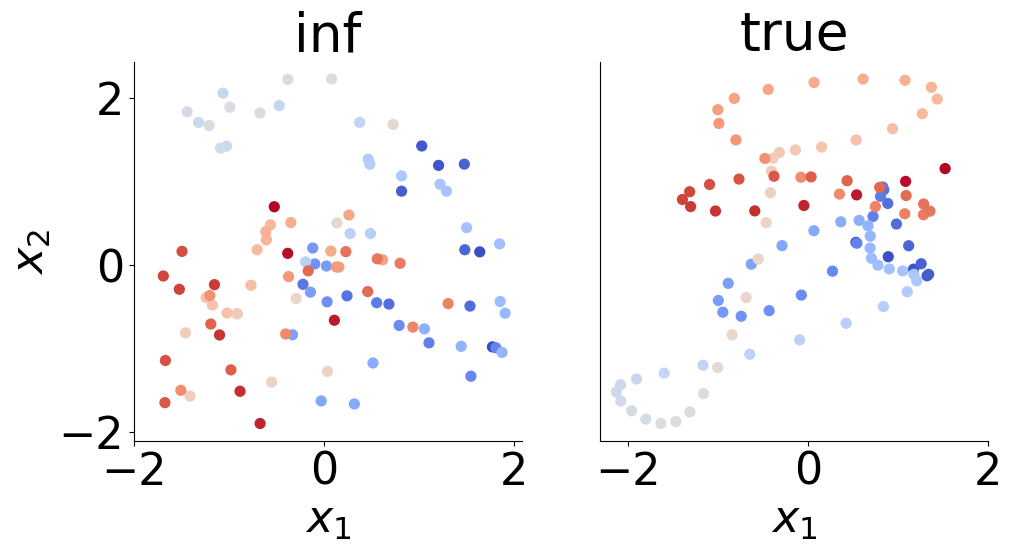

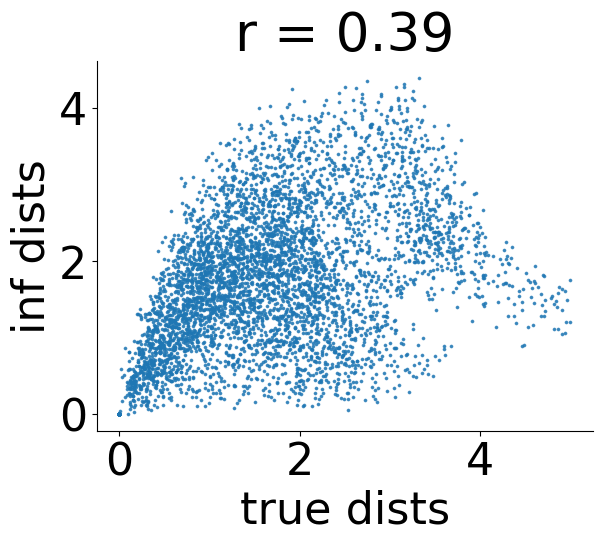

In [113]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xpca1 = pca.fit_transform(Y1.T).T
comp_lats([Xpca1, X1], cs = [np.arange(T) for _ in range(2)], cmap = 'coolwarm', titles = ['inf', 'true'])
eval_lats(Xpca1, X1)

Xpca2 = pca.fit_transform(Y2.T).T
comp_lats([Xpca2, X2], cs = [np.arange(T) for _ in range(2)], cmap = 'coolwarm', titles = ['inf', 'true'])
eval_lats(Xpca2, X2)


In [114]:
from elephant.gpfa import GPFA
import quantities as pq

bin_size = 20 * pq.ms
gpfa = GPFA(bin_size=bin_size, x_dim=2)
gpfa.fit([X1])
X1gpfa = gpfa.transform([X1])

ValueError: structure of the spiketrains is not correct: 0-axis should be trials, 1-axis neo.SpikeTrainand 2-axis spike times